<a href="https://colab.research.google.com/github/jvishnuvardhan/Stackoverflow_Questions/blob/master/plot_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly

     |████████████████████████████████| 520.9MB 30kB/s 
     |████████████████████████████████| 2.9MB 36.6MB/s 
     |████████████████████████████████| 460kB 36.8MB/s 


100/100 - 9s - loss: 0.5509 - accuracy: 0.8272 - val_loss: 0.2406 - val_accuracy: 0.9268

Training finished

Testing 10000 samples
313/313 [==============================] - 4s 14ms/step - loss: 0.2650 - accuracy: 0.9152
Testing finished



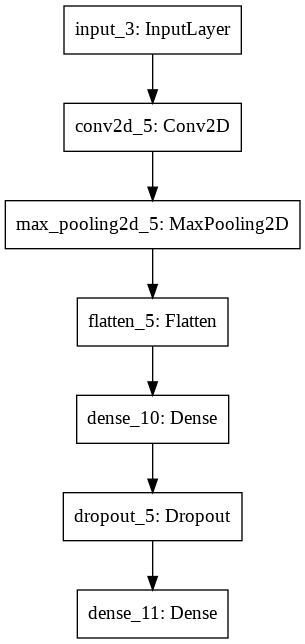

In [10]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from numpy import argmax
from matplotlib import pyplot
from random import randint

tf.keras.backend.set_floatx("float64")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

class mnist_model(Model):
    def __init__(self):
        super(mnist_model, self).__init__()
        self.conv = Conv2D(32, 3, activation = tf.nn.leaky_relu, kernel_initializer = 'he_uniform', input_shape = (28, 28, 3))
        self.pool = MaxPool2D((2,2))
        self.flat = Flatten()
        self.den1 = Dense(128, activation = tf.nn.relu, kernel_initializer = 'he_normal')
        self.drop = Dropout(0.25)
        self.den2 = Dense(10, activation = tf.nn.softmax)

    def call(self, inputs):
        n = self.conv(inputs)
        n = self.pool(n)
        n = self.flat(n)
        n = self.den1(n)
        n = self.drop(n)
        return self.den2(n)
    def model(self):
        x = tf.keras.layers.Input(shape=(28, 28, 1))
        return Model(inputs=[x], outputs=self.call(x))

model_mnist = mnist_model()
model= model_mnist.model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

limit = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(x_train, y_train, batch_size=64, epochs = 1, verbose = 2, validation_split = 0.15, steps_per_epoch = 100, callbacks = [limit])
print("\nTraining finished\n\nTesting 10000 samples")
model.evaluate(x_test, y_test, verbose = 1)
print("Testing finished\n")


plot_model(model, show_shapes = False) #rankdir = 'LR'

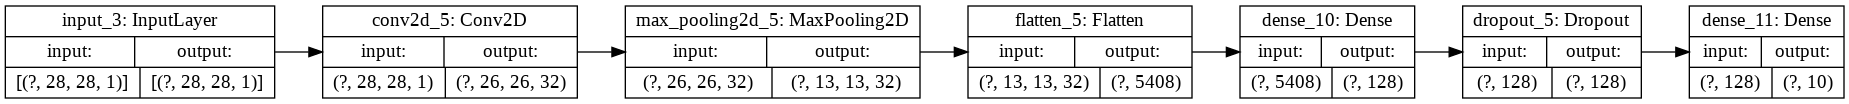

In [12]:
plot_model(model, show_shapes = True, rankdir = 'LR') #

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290